# Linear Regrssion on US Housing Price


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


    Check basic info on the data set

    'info()' method to check the data types and number

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
Unnamed: 0                      5000 non-null int64
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


    'describe()' method to get the statistical summary of the various features of the data set

In [6]:
df.describe()

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2499.500000,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,1443.520003,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,0.000000,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,1249.750000,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,2499.500000,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,3749.250000,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,4999.000000,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization on the data set

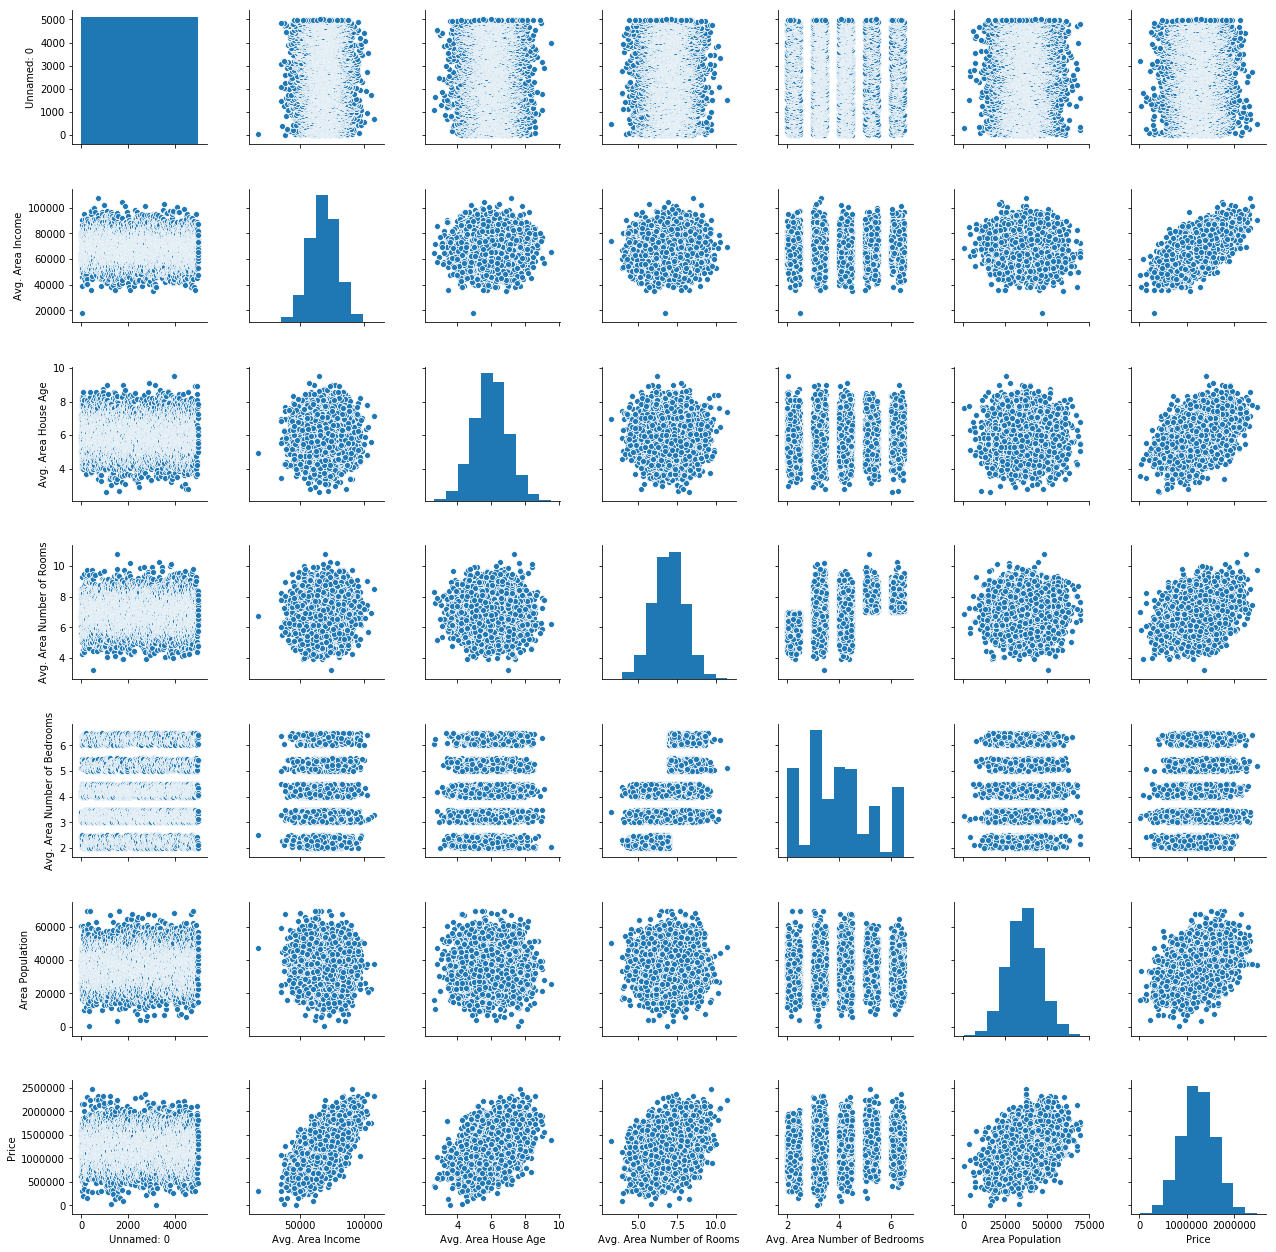

In [8]:
sns.pairplot(df)

    Distribution of price 

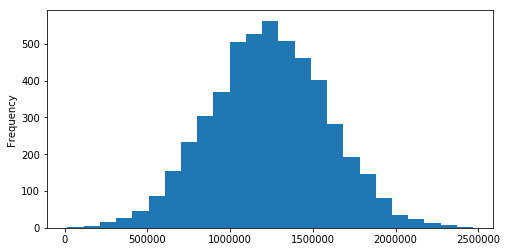

In [9]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

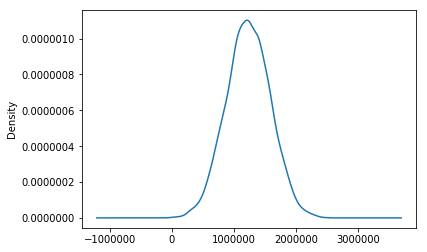

In [10]:
df['Price'].plot.density()

### Correlation matrix and heatmap

In [11]:
df.corr()

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Unnamed: 0,1.000000,-0.007361,-0.019383,-0.012377,0.003176,0.006872,-0.017748
Avg. Area Income,-0.007361,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.019383,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.012377,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.003176,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,0.006872,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,-0.017748,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


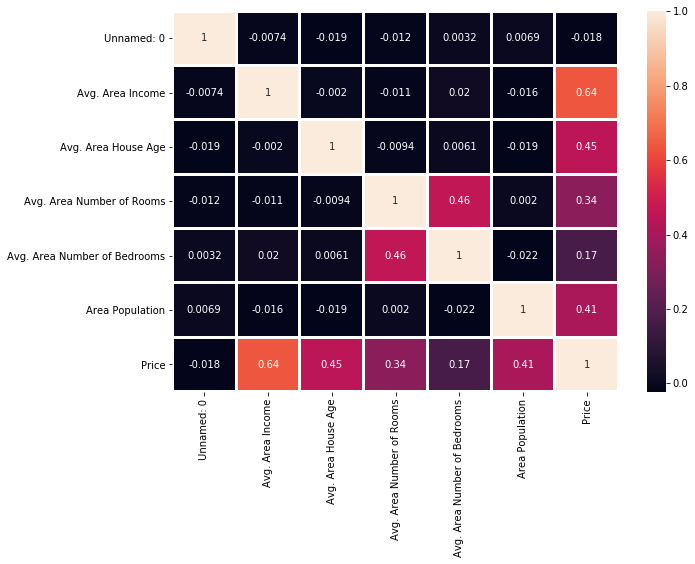

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

### Feature and variable sets
#### Make a list of data frame column names

In [14]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Unnamed: 0',
 'Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

### Put all the numerical features in X and Price in y, ignore Address which is string for linear regression

In [20]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

In [21]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 6)
Variable set size: (5000,)


In [22]:
X.head()

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [24]:
X = X.drop(['Unnamed: 0'], axis = 1)

In [25]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [26]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

#### Import train_test_split function from scikit-learn

In [28]:
from sklearn.model_selection import train_test_split

### Create X and y train and test splits in one command using a split ratio and a random seed

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)

In [30]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


### Model fit and training

#### Import linear regression model estimator from scikit-learn and instantiate

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

#### Fit the model on to the instantiated object itself

In [33]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Check the intercept and coefficients and put them in a DataFrame

In [34]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -2631028.9017465496


In [35]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
 1.52281212e+01]


In [36]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
Avg. Area Income,21.597602
Avg. Area House Age,165201.104954
Avg. Area Number of Rooms,119061.463868
Avg. Area Number of Bedrooms,3212.585606
Area Population,15.228121


### Calculation of standard errors and t-statistic for the coefficients

In [37]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,21.597602,0.160361,134.681505
Avg. Area House Age,165201.104954,1722.412068,95.912649
Avg. Area Number of Rooms,119061.463868,1696.546476,70.178722
Avg. Area Number of Bedrooms,3212.585606,1376.451759,2.333962
Area Population,15.228121,0.169882,89.639472


In [38]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
Avg. Area Income > 
Avg. Area House Age > 
Area Population > 
Avg. Area Number of Rooms > 
Avg. Area Number of Bedrooms


Text(0.5, 1.0, 'Area Population vs. Price')

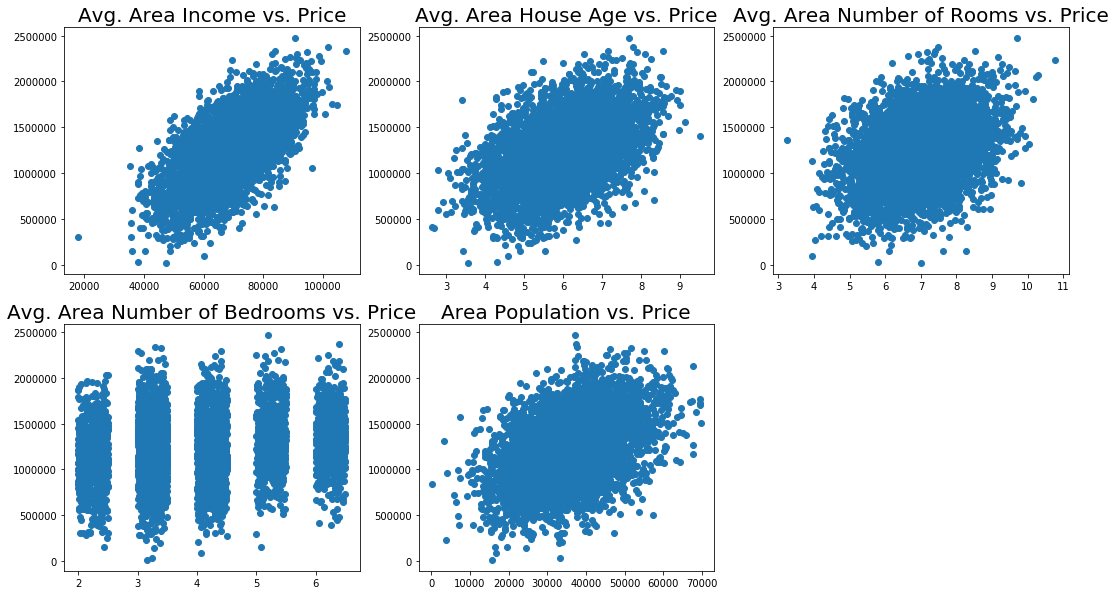

In [39]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

### R-square of the model fit

In [40]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.917


#### Prediction, error estimate, and regression evaluation matrices

#### Prediction using the lm model

In [42]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


#### Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line

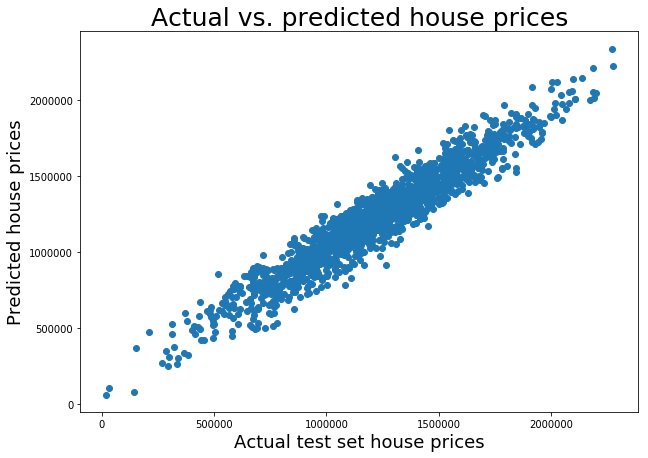

In [43]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

#### Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)

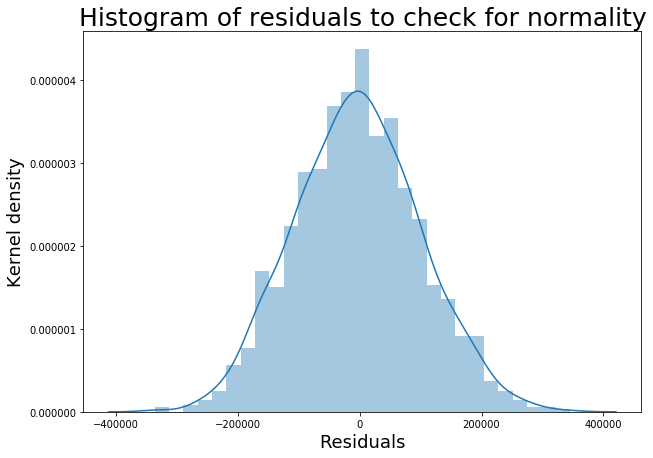

In [45]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

#### Scatter plot of residuals and predicted values (Homoscedasticity)

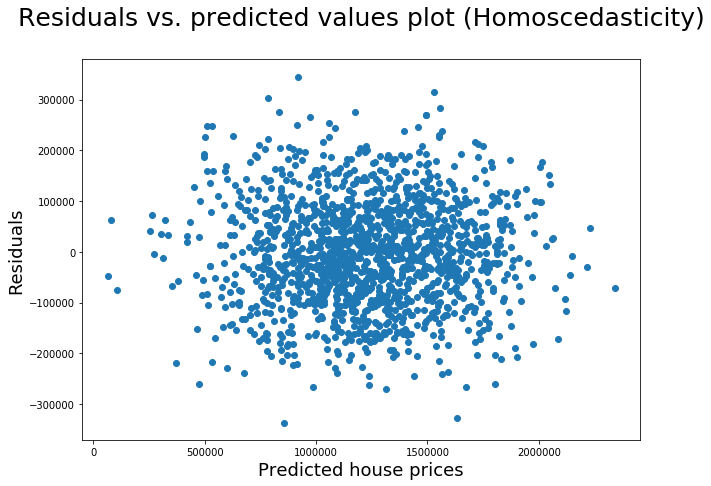

In [46]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

#### Regression evaluation metrices

In [47]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 81739.77482718219
Mean square error (MSE): 10489638335.805494
Root mean square error (RMSE): 102418.93543581429


#### R-square value

In [48]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.919
